In [372]:
#Import dependencies
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [373]:
#Create dataframe
df = pd.read_excel('/Users/bbaidya/q3/AirQuality.xlsx')
#Display & examine some data
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


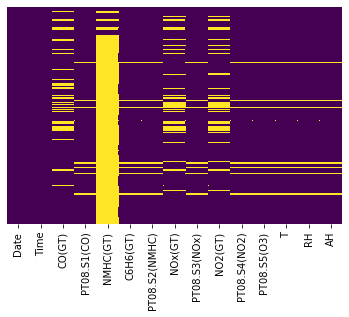

In [374]:
df.replace(to_replace= -200, value= np.NaN, inplace= True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [375]:
df.drop(['NMHC(GT)'], axis= 1, inplace= True)

(9357, 14)

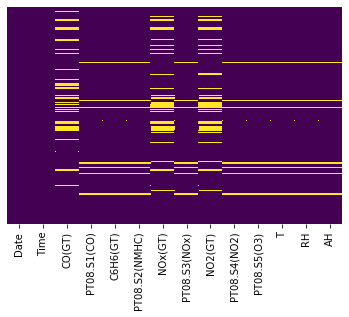

In [376]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.shape

In [377]:
df["CO(GT)"] = df.groupby("Date")["CO(GT)"].transform(lambda x: x.fillna(x.mean()))
df["NOx(GT)"] = df.groupby("Date")["NOx(GT)"].transform(lambda x: x.fillna(x.mean()))
df["NO2(GT)"] = df.groupby("Date")["NO2(GT)"].transform(lambda x: x.fillna(x.mean()))

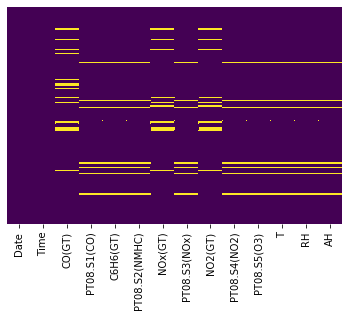

In [378]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [379]:
df.fillna(method='ffill', inplace= True)

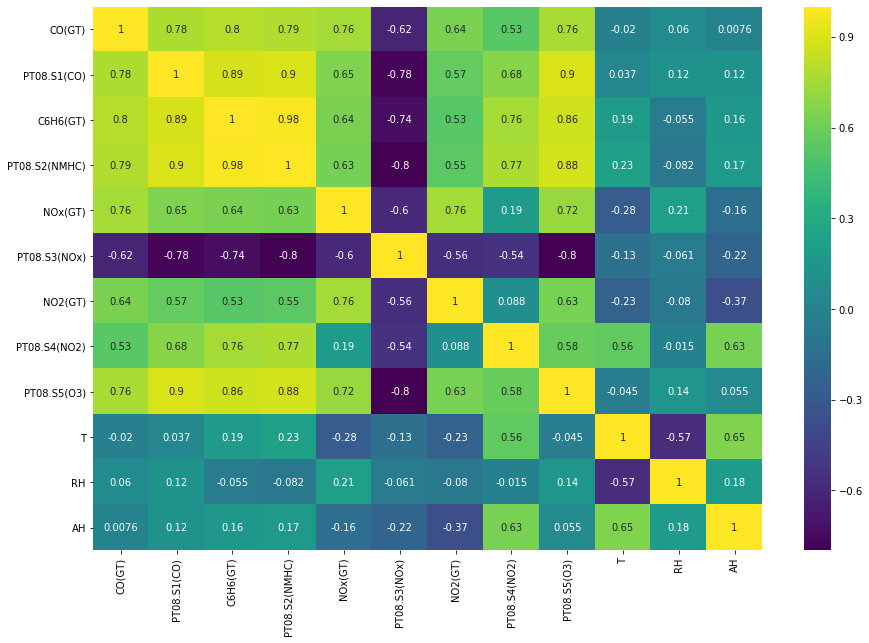

In [380]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [381]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

# Minibatch Gradient Descent

In [428]:
mb_learning_rate = 0.001
mb_max_iteration = 10000
batch_size = 1000

In [429]:
def h (theta, X) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  return np.matmul(tempX, theta)

In [430]:
def loss (theta, X, Y) :
  return np.average(np.square(Y - h(theta, X))) / 2

In [431]:
def gradient (theta, X, Y) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  d_theta = - np.average((Y - h(theta, X)) * tempX, axis= 0)
  d_theta = d_theta.reshape((d_theta.shape[0], 1))
  return d_theta

In [432]:
def minibatch_gradient_descent (theta, X, Y, learning_rate, max_iteration, batch_size, gap) :
  cost = np.zeros(max_iteration)
  prediction_list = []
  for i in range(max_iteration) :
    for j in range(0, X.shape[0], batch_size):
      d_theta = gradient (theta, X[j:j+batch_size,:], Y[j:j+batch_size,:])
      theta = theta - learning_rate * d_theta
    cost[i] = loss(theta, X, Y)
    #if i % gap == 0 :
      #print ('iteration : ', i, ' loss : ', loss(theta, X, Y))     
  return theta, cost, prediction_list

In [433]:
x_1 = preprocessing.scale(df['PT08.S1(CO)'])
X = np.c_[x_1]
x = np.c_[x_1]
Y = np.c_[df['CO(GT)']]

mb_theta = np.zeros((X.shape[1]+1, 1))
#print(mb_theta)

mb_theta, mb_cost, prediction_list = minibatch_gradient_descent (mb_theta, X, Y, mb_learning_rate, mb_max_iteration, batch_size, 100)

#print(x.shape)
yp = mb_theta[0] +mb_theta[1]*x[:,0]

MSE_equ = ((yp-y)**2).mean()
MSE_GD = ((prediction_list[-1]-y)**2).mean() 

print('Mean Square Error using equation of hyperplane : {}'.format(round(MSE_equ,3)))
#print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))

ValueError: shapes (9357,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

In [424]:
x_1 = preprocessing.scale(df['PT08.S1(CO)'])
x_2 = preprocessing.scale(df['C6H6(GT)'])
X = np.c_[x_1, x_2]
x = np.c_[x_1, x_2]
Y = np.c_[df['CO(GT)']]

mb_theta = np.zeros((X.shape[1]+1, 1))
#print(mb_theta)

mb_theta, mb_cost, prediction_list = minibatch_gradient_descent (mb_theta, X, Y, mb_learning_rate, mb_max_iteration, batch_size, 100)

In [425]:
#print(x.shape)
yp = mb_theta[0] +mb_theta[1]*x[:,0] + mb_theta[2]*x[:,1]

MSE_equ = ((yp-y)**2).mean()
#MSE_GD = ((prediction_list[-1]-y)**2).mean() 

print('Mean Square Error using equation of hyperplane : {}'.format(round(MSE_equ,3)))
#print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))

Mean Square Error using equation of hyperplane : 4.767


In [391]:
x_1 = preprocessing.scale(df['PT08.S1(CO)'])
x_2 = preprocessing.scale(df['C6H6(GT)'])
x_3 = preprocessing.scale(df['PT08.S2(NMHC)'])
X = np.c_[x_1, x_2, x_3]
x = np.c_[x_1, x_2, x_3]
Y = np.c_[df['CO(GT)']]

In [392]:
mb_theta = np.zeros((X.shape[1]+1, 1))
#print(mb_theta)

In [393]:
mb_theta, mb_cost, prediction_list = minibatch_gradient_descent (mb_theta, X, Y, mb_learning_rate, mb_max_iteration, batch_size, 100)

In [394]:
mb_theta

array([[ 2.07950054],
       [ 0.47524626],
       [ 0.93393586],
       [-0.23667337]])

In [395]:
#print(mb_theta[1]*x[:,0])
yp = mb_theta[0] + mb_theta[1]*x[:,0] + mb_theta[2]*x[:,1] + mb_theta[3]*x[:,2]

MSE_equ = ((yp-y)**2).mean()
#MSE_GD = ((prediction_list[-1]-y)**2).mean() 

print('Mean Square Error using equation of hyperplane : {}'.format(round(MSE_equ,3)))
#print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))

Mean Square Error using equation of hyperplane : 4.759


In [396]:
x_1 = preprocessing.scale(df['PT08.S1(CO)'])
x_2 = preprocessing.scale(df['C6H6(GT)'])
x_3 = preprocessing.scale(df['PT08.S2(NMHC)'])
x_4 = preprocessing.scale(df['NOx(GT)'])
X = np.c_[x_1, x_2, x_3, x_4]
x = np.c_[x_1, x_2, x_3,x_4]
Y = np.c_[df['CO(GT)']]

In [397]:
mb_theta = np.zeros((X.shape[1]+1, 1))

In [398]:
mb_theta, mb_cot, prediction_list = minibatch_gradient_descent (mb_theta, X, Y, mb_learning_rate, mb_max_iteration, batch_size, 100)

In [408]:
#print(mb_theta[1]*x[:,0])
yp = mb_theta[0] + mb_theta[1]*x[:,0] + mb_theta[2]*x[:,1] + mb_theta[3]*x[:,2] + mb_theta[4]*x[:,3]

MSE_equ = ((yp-y)**2).mean()
#MSE_GD = ((prediction_list[-1]-y)**2).mean() 

print('Mean Square Error using equation of hyperplane : {}'.format(round(MSE_equ,3)))
#print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))

Mean Square Error using equation of hyperplane : 4.754


In [409]:
x_1 = preprocessing.scale(df['PT08.S1(CO)'])
x_2 = preprocessing.scale(df['C6H6(GT)'])
x_3 = preprocessing.scale(df['PT08.S2(NMHC)'])
x_4 = preprocessing.scale(df['NOx(GT)'])
x_5 = preprocessing.scale(df['PT08.S3(NOx)'])
X = np.c_[x_1, x_2, x_3, x_4, x_5]
x = np.c_[x_1, x_2, x_3,x_4, x_5]
Y = np.c_[df['CO(GT)']]

In [410]:
mb_theta = np.zeros((X.shape[1]+1, 1))

In [411]:
mb_theta, mb_cot, prediction_list = minibatch_gradient_descent (mb_theta, X, Y, mb_learning_rate, mb_max_iteration, batch_size, 100)

In [412]:
#print(mb_theta[1]*x[:,0])
yp = mb_theta[0] + mb_theta[1]*x[:,0] + mb_theta[2]*x[:,1] + mb_theta[3]*x[:,2] + mb_theta[4]*x[:,3] + mb_theta[5]*x[:,4]

MSE_equ = ((yp-y)**2).mean()
#MSE_GD = ((prediction_list[-1]-y)**2).mean() 

print('Mean Square Error using equation of hyperplane : {}'.format(round(MSE_equ,3)))
#print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))

Mean Square Error using equation of hyperplane : 4.692


In [413]:
x_1 = preprocessing.scale(df['PT08.S1(CO)'])
x_2 = preprocessing.scale(df['C6H6(GT)'])
x_3 = preprocessing.scale(df['PT08.S2(NMHC)'])
x_4 = preprocessing.scale(df['NOx(GT)'])
x_5 = preprocessing.scale(df['PT08.S3(NOx)'])
x_6 = preprocessing.scale(df['NO2(GT)'])
X = np.c_[x_1, x_2, x_3, x_4, x_5, x_6]
x = np.c_[x_1, x_2, x_3,x_4, x_5, x_6]
Y = np.c_[df['CO(GT)']]

In [414]:
mb_theta = np.zeros((X.shape[1]+1, 1))

In [415]:
mb_theta, mb_cot, prediction_list = minibatch_gradient_descent (mb_theta, X, Y, mb_learning_rate, mb_max_iteration, batch_size, 100)

In [416]:
#print(mb_theta[1]*x[:,0])
yp = mb_theta[0] + mb_theta[1]*x[:,0] + mb_theta[2]*x[:,1] + mb_theta[3]*x[:,2] + mb_theta[4]*x[:,3] + mb_theta[5]*x[:,4]+ mb_theta[6]*x[:,5]
MSE_equ = ((yp-y)**2).mean()
#MSE_GD = ((prediction_list[-1]-y)**2).mean() 

print('Mean Square Error using equation of hyperplane : {}'.format(round(MSE_equ,3)))
#print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))

Mean Square Error using equation of hyperplane : 4.685


In [417]:
x_1 = preprocessing.scale(df['PT08.S1(CO)'])
x_2 = preprocessing.scale(df['C6H6(GT)'])
x_3 = preprocessing.scale(df['PT08.S2(NMHC)'])
x_4 = preprocessing.scale(df['NOx(GT)'])
x_5 = preprocessing.scale(df['PT08.S3(NOx)'])
x_6 = preprocessing.scale(df['NO2(GT)'])
x_7 = preprocessing.scale(df['PT08.S4(NO2)'])
X = np.c_[x_1, x_2, x_3, x_4, x_5, x_6, x_7]
x = np.c_[x_1, x_2, x_3,x_4, x_5, x_6, x_7]
Y = np.c_[df['CO(GT)']]

mb_theta = np.zeros((X.shape[1]+1, 1))
mb_theta, mb_cot, prediction_list = minibatch_gradient_descent (mb_theta, X, Y, mb_learning_rate, mb_max_iteration, batch_size, 100)

#print(mb_theta[1]*x[:,0])
yp = mb_theta[0] + mb_theta[1]*x[:,0] + mb_theta[2]*x[:,1] + mb_theta[3]*x[:,2] + mb_theta[4]*x[:,3] + mb_theta[5]*x[:,4]+ mb_theta[6]*x[:,5] + mb_theta[7]*x[:,6] 
MSE_equ = ((yp-y)**2).mean()
#MSE_GD = ((prediction_list[-1]-y)**2).mean() 

print('Mean Square Error using equation of hyperplane : {}'.format(round(MSE_equ,3)))
#print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))

Mean Square Error using equation of hyperplane : 4.684


In [418]:
x_1 = preprocessing.scale(df['PT08.S1(CO)'])
x_2 = preprocessing.scale(df['C6H6(GT)'])
x_3 = preprocessing.scale(df['PT08.S2(NMHC)'])
x_4 = preprocessing.scale(df['NOx(GT)'])
x_5 = preprocessing.scale(df['PT08.S3(NOx)'])
x_6 = preprocessing.scale(df['NO2(GT)'])
x_7 = preprocessing.scale(df['PT08.S4(NO2)'])
x_8 = preprocessing.scale(df['PT08.S5(O3)'])
X = np.c_[x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8]
x = np.c_[x_1, x_2, x_3,x_4, x_5, x_6, x_7, x_8]
Y = np.c_[df['CO(GT)']]

mb_theta = np.zeros((X.shape[1]+1, 1))
mb_theta, mb_cot, prediction_list = minibatch_gradient_descent (mb_theta, X, Y, mb_learning_rate, mb_max_iteration, batch_size, 100)

#print(mb_theta[1]*x[:,0])
yp = mb_theta[0] + mb_theta[1]*x[:,0] + mb_theta[2]*x[:,1] + mb_theta[3]*x[:,2] + mb_theta[4]*x[:,3] + mb_theta[5]*x[:,4]+ mb_theta[6]*x[:,5] + mb_theta[7]*x[:,6] + mb_theta[8]*x[:,7] 
MSE_equ = ((yp-y)**2).mean()
#MSE_GD = ((prediction_list[-1]-y)**2).mean() 

print('Mean Square Error using equation of hyperplane : {}'.format(round(MSE_equ,3)))
#print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))

Mean Square Error using equation of hyperplane : 4.678
